# Property Sales in Edison Town, USA

This dataset contains property sale prices for Edison town. It includes Property sold between Jan 2018 and Aug 2021.

In [1]:
#Import the following libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import time
import warnings
warnings.filterwarnings("ignore")
from geopy.geocoders import Nominatim
import time
from pprint import pprint
import seaborn as sns
import plotly.express as px
from datetime import date
%matplotlib inline
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
from plotly import tools
import plotly as py

import SupplyVsDemand as sd
import pricebinning as pb
import livingsquarefootbinning as lsb
import housingtype as hb
import FactorsAffectingPropertySale as fp
import directionfacesbinning as df

import warnings
warnings.filterwarnings("ignore")
import os



# 1.0 Exploratory Data Analysis (EDA)

Question 1 Display Statistical summary for numeric data include things like the mean, min, and max of the data.

In [2]:
fp.mls_data_describe()

,count,mean,std,min,25%,50%,75%,max
Property_id,2092.0,1081.950765,640.128887,0.000000,525.750000,1058.500000,1661.250000,2.186000e+03
BedroomsTotal,2092.0,2.916348,1.172040,0.000000,2.000000,3.000000,4.000000,6.000000e+00
FireplacesTotal,2059.0,0.319087,0.502356,0.000000,0.000000,0.000000,1.000000,3.000000e+00
house_longitude,1608.0,-74.373837,0.025626,-74.425965,-74.395293,-74.375962,-74.352695,-7.431770e+01
TaxAnnualAmount,1584.0,10233.356061,34719.868914,0.000000,6281.000000,8095.500000,11113.000000,8.443500e+05
house_latitude,1608.0,40.542404,0.031332,40.493233,40.515169,40.533294,40.569367,4.060499e+01
ListPrice,2092.0,309632.963193,250077.650161,600.000000,42350.000000,326950.000000,469000.000000,2.500000e+06
CoveredSpaces,2075.0,0.860723,0.840383,0.000000,0.000000,1.000000,2.000000,4.000000e+00
StoriesTotal,2092.0,1.304493,1.025509,0.000000,0.000000,2.000000,2.000000,5.000000e+00
YearBuilt,2092.0,1876.777725,505.668233,0.000000,1954.000000,1969.000000,1985.000000,9.999000e+03


ClosePrice (Target Value):From above describe() method we conclude for ClosePrice that
The std is big.
min is greater than 0
There is a big difference between the minimum value and the 25th percentile.
It’s bigger than the 75th percentile and max.
The difference between the 75th percentile and the max is greater than the 25th percentile and the max.

Question 2 Display information about dataset like total values in each column, null/not null, datatype, memory occupied.

In [3]:
fp.mls_data_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2186
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Property_id             2092 non-null   int64         
 1   BedroomsTotal           2092 non-null   int64         
 2   Flooring                2002 non-null   object        
 3   FireplacesTotal         2059 non-null   float64       
 4   Cooling                 2092 non-null   object        
 5   GarageYN                2075 non-null   object        
 6   house_longitude         1608 non-null   float64       
 7   RoomDiningRoomFeatures  1608 non-null   object        
 8   ListingContractDate     2092 non-null   datetime64[ns]
 9   Appliances              2061 non-null   object        
 10  TaxAnnualAmount         1584 non-null   float64       
 11  house_latitude          1608 non-null   float64       
 12  PropertyType            2092 non-null   object  

Question 3 Display the missing value percentage of dataset.

In [4]:
fp.missing_count()

Total number Of Missing Values =  6998


,Missing Ratio,Missing Values
ArchitecturalStyle,45.084591,986
LotFeatures,44.627343,976
LotSizeArea,38.637403,845
Sewer,26.977595,590
TaxAnnualAmount,23.868313,522
TaxYear,23.868313,522
RoomDiningRoomFeatures,23.548240,515
house_longitude,22.862369,500
house_latitude,22.862369,500
ParkingFeatures,11.156836,244


Judged from the above table, we can conclude that the majority of variables are having less % of null values.

# 1.1 Factors Affected the Closed Price of Property

Question 1 Display heat map to get quick overview of variables correlation relationships.

<AxesSubplot:>

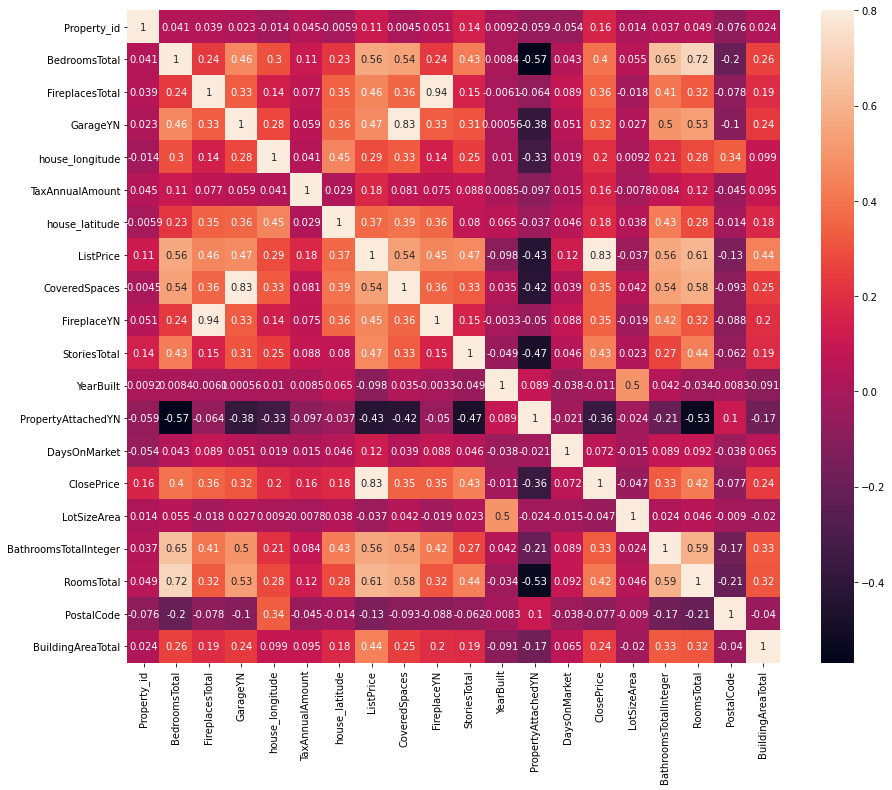

In [5]:
fp.corrextraction()

Question 2 Display correlation table with correlation percentage of variables with target variable.

In [6]:
fp.corrpercentage()

,index,ClosePrice,Correlation_Percentage(%)
0,ClosePrice,1.000000,100
1,ListPrice,0.829757,82
2,StoriesTotal,0.432435,43
3,RoomsTotal,0.416601,41
4,BedroomsTotal,0.396535,39
5,FireplacesTotal,0.355655,35
6,FireplaceYN,0.349494,34
7,CoveredSpaces,0.347606,34
8,BathroomsTotalInteger,0.332366,33
9,GarageYN,0.317468,31


Question 3 Display visualization of factors that are affected the property sale.

In [7]:
# fp.factoraffectedpropertysale()

{% include factoraffectedpropertysale.html %}

ListPrice, StoriesTotal,RoomsTotal,BedroomsTotal etc. are highly correlated with our response variable, ClosePrice.
We can then conclude that area-related variables (including ground BuildingAreaTotal, FireplacesTotal, number of rooms) 
are the major continuous factors associated with the ClosePrice of a house.

# 1.2 Market Insights To gather 

1.2.1 Visualization of Supply vs Demand (number of property in Active vs Closed State)

Question 1 Display visualization of Active Property By Year and Region Code.

In [8]:
# sd.activehouseareacode()

{% include activehouseareacode.html %}

Following are the observation that we can conclude from above visualization:
1) More Active Properties are from Region Code 8817,8820 and 8837.
2) The highest Active property frequency of Region Code 8820 in 2018 and goes down in 2019 and 2020.
3) The highest Active property frequency of Region Code 8817 in 2019 and goes down in 2020.

Question 2 Display the visualization of Closed Property By Year and Region Code.

In [9]:
# sd.closedhouseareacode()

{% include closedhouseareacode.html %}

Following are the observation that we can conclude from above visualization:
1) More Properties are sold out from Region Code 8817,8820 and 8837.
2) The highest Sold property frequency of Region Code 8817 in 2019 and goes down in 2020.
3) 250 Property are sold from Region Code 8817 in 2018 and 2019.

Question 3 Display the visualization of Frequency of Active vs Sold Property Distribution by Week.

In [10]:
# sd.ferquencyactivevssoldoverweek()

{% include ferquencyactivevssoldoverweek.html %}

Following are the observation that we can conclude from above visualization:
1) More Properties are Active for selling in weekgroup 10-20,20-30 and 30-40.
2) Less Properties are listed for selling in the end of the year.
3) From 2018 and 2019 year, We can conclude more Properties are Sold out in weekgroup 20-30,30-40 and 40-50.


1.2.2 Visualization of Median home sale price and Days on Market 

# Price Binning

Question 1 Display visualization of Median Selling Price and Price Binning.

In [11]:
# pb.sellingprice()

{% include pbsellingprice.html %}

From the above graph, we can conclude the Median Sold Price increases with the increasing Price Binning.

Question 2 Display visualization of Frequency of Property and Price Binning.

In [12]:
# pb.propertydistribution()

{% include pbpropertydistribution.html %}

Following are the observation that we can conclude from above visualization:
1) Highest Properties are Sold in Price Range Below and Equal to $167000.
2) Highest the Price, Lesser Properties are sold out.


Question 3 Display visualization of Property Market Trends and Price Binning.

In [13]:
# pb.daysonmarket()

{% include pbdaysonmarket.html %}

Following are the observation that we can conclude from above visualization:
1) Property with Less Prices are Sold fastly.
2) Propert with High Prices saty longer in Market.

Question 4 Display visualization of Property Sale over Months.

In [14]:
# pb.sellinghousebymonth()

{% include pbsellinghousebymonth.html %}

Following are the observation that we can conclude from above visualization:
1) Highest Revenue of Properties occured in Jun,2019.
2) More Revenue are collected in Jun,Aug and Oct months over all years.
3) The Revenue went down in Apr Month.
4) Same Revenue had collected in Jul'2018 and Jul'2021 
5) January: 2020 was the year with the highest "average" sales for this month. However, January tends to be low in sales activity.
6) April: 2019 and 2020 were the year with the highest sales for this month with 11.32M in average sales.


Question 5 Display visualization of Percentage Change in Property Sold over Months.

In [15]:
# pb.percentagechangepriceovermonths()

{% include pbpercentagechangepriceovermonths.html %}

Following are the observation that we can conclude from above visualization:
Percent Change 2018 - 2019:
March: There was a 213% sales increase in Mar 2019 compared to Mar 2018.
April: There was a -1% sales decrease in Apr 2019 compared to Apr 2018.
May: There was a 116% sales increase in May 2019 compared to May 2018.
June: There was a 28% sales increase in Jun 2019 compared to Jun 2018.
July: There was a 37% sales increase in Jul 2019 compared to Jul 2018.
August: There was a 10% sales increase in Aug 2019 compared to Aug 2018.
September: There was a 15% sales increase in Sep 2019 compared to Sep 2018.
October: There was a 35% sales increase in Oct 2019 compared to Oct 2018.
November: There was a -13% sales decline in Nov 2019 compared to Nov 2018.
December: There was a 11% sales increase in Dec 2019 compared to Dec 2018.

Percent Change 2019 - 2020:
January: There was a 19% sales increase in Jan 2020 compared to Jan 2019.
February: There was a 49% sales increase in Feb 2020 compared to Feb 2019.
March: There was a -30% sales decrease in Mar 2020 compared to Mar 2019.
April: There was a 1% sales increase in Apr 2020 compared to Apr 2019.
May: There was a -58% sales decrease in May 2020 compared to May 2019.
June: There was a -56% sales decrease in Jun 2020 compared to Jun 2019.
July: There was a -17% sales decrease in Jul 2020 compared to Jul 2019.
August: There was a -6% sales decrease in Aug 2020 compared to Aug 2019.
September: There was a 44% sales increase in Sep 2020 compared to Sep 2019.
October: There was a -3% sales decrease in Oct 2020 compared to Oct 2019.
November: There was a -55% sales decline in Nov 2020 compared to Nov 2019.
December: There was a -1% sales decrease in Dec 2020 compared to Dec 2019.

Percent Change 2020 - 2021:
January: There was a -21% sales decrease in Jan 2021 compared to Jan 2020.
February: There was a 25% sales increase in Feb 2021 compared to Feb 2020.
March: There was a 19% sales increase in Mar 2021 compared to Mar 2020.
April: There was a -24% sales decrease in Apr 2021 compared to Apr 2020.
May: There was a 82% sales increase in May 2021 compared to May 2020.
June: There was a 73% sales increase in Jun 2021 compared to Jun 2020.
July: There was a -12% sales decrease in Jul 2021 compared to Jul 2020.
August: There was a -76% sales decrease in Aug 2021 compared to Aug 2020.


Question 6 Display visualization of Variation of Property Sold Price Over the Months.

In [16]:
# pb.variationofsellingpriceovermonths()

{% include pbvariationofsellingpriceovermonths.html %}

Following are the observation that we can conclude from above visualization:
1) Revenue Went down in Feb, Jul and Nov month with respect to their previous month.
2) Highest percentage increase in Revenue from March to July.


Question 7 Display visualization of Variation of Property Sold Price  and Property Market Trend Quaterly.

In [17]:
# pb.variationsellingquaterly()

{% include pbvariationsellingquaterly1.html %}

{% include pbvariationsellingquaterly2.html %}

Following are the observation that we can conclude from above visualization:

Median Sale Price:
1)2018: There was a 110% sales increase in Quater-II compared to Quater-I.
2)2018: There was a -45% sales decrease in Quater-III compared to Quater-I.
3)2019: There was a -53% sales decrease in Quater-II compared to Quater-I.
4)2019: There was a 59% sales increase in Quater-III compared to Quater-I.
5)2020: There was a 13% sales increase in Quater-II compared to Quater-I.
6)2020: There was a -38% sales decrease in Quater-III compared to Quater-I
7)2021: There was a 12% sales increase in Quater-II compared to Quater-I.

Property Days on Markets Trends:
1)2018: There was a 24% sales increase in Quater-II compared to Quater-I.
2)2018: There was a 67% sales increase in Quater-III compared to Quater-I.
3)2019: There was a 4% sales increase in Quater-II compared to Quater-I.
4)2019: There was a -15% sales decrease in Quater-III compared to Quater-I.
5)2020: There was a 13% sales increase in Quater-II compared to Quater-I.
6)2020: There was a -4% sales decrease in Quater-III compared to Quater-I
7)2021: There was a -56% sales decrease in Quater-II compared to Quater-I.


# Housing Type Binning

Question 1 Display visualization of Variation of Property Selling Price By Years and Property Type.

In [18]:
# hb.sellingpriceyearoverpropertytype()

{% include sellingpriceyearoverpropertytype.html %}

Following are the observation that we can conclude from above visualization:
1) Commerical Property Price drastically increased in years 2020 and 2021.
2) Residential Property Price remained same in 2018 and 2019. It was increased by $20k in 2020 and $60k in 2021.
3) Residential Income Price was decreased in 2019 by $10K as compared to 2018. It was remained same in 2020 and 2021. 

Question 2 Display visualization of Variation of Property Selling Price and Property Market Trends over Quater-I .

In [19]:
# hb.firstquater()

{% include firstquater1.html %}

{% include firstquater2.html %}

Following are the observation that we can conclude from above visualization:
Median Sale Price Quater-I:
1) Median Sale Price of Residential Property were $330K, $330K , $350K and $400K in years 2018,2019,2020 and 2021.
2) Median Sale Price of Residential Income Property were $460K and $360K in years 2019 and 2020.
3) Median Sale Price of Residential Lease Property were $1700 , $1900 , $1900 and $1900 in years 2018,2019,2020 and 2021 .
4) Median Sale Price of Commerical Sale Property were $600K and $1.7M in years 2019 and 2021.

Property Days on Markets Trends Quater-I:
1) Market Trends of Residential Property were 29, 58, 37 and 31 days in years 2018,2019,2020 and 2021.
2) Market Trends of Residential Income Property were 20 and 152 days in years 2019 and 2020.
3) Market Trends of Residential Lease Property were 21, 42, 32 and 50 days in years 2018,2019,2020 and 2021.
4) Market Trends of Commerical Sale Property were 140 and 240 days in years 2019 and 2021.

Question 3 Display visualization of Variation of Property Selling Price and Property Market Trends over Quater-II .

In [20]:
# hb.secondquater()

{% include secondquater1.html %}

{% include secondquater2.html %}

Following are the observation that we can conclude from above visualization:
Median Sale Price Quater-II:
1) Median Sale Price of Residential Property were $370K, $400K , $390K and $490K in years 2018,2019,2020 and 2021.
2) Median Sale Price of Residential Income Property were $340K , $370K ,$410K and $410K in years 2018,2019,2020 and 2021.
3) Median Sale Price of Residential Lease Property were $2000 , $1900 , $2300 and $2300 in years 2018,2019,2020 and 2021 .
4) Median Sale Price of Commerical Sale Property were $1300 , $650K and $700K in years 2019,2020 and 2021.

Property Days on Markets Trends Quater-II:
1) Market Trends of Residential Property were 31, 37, 44 and 19 days in years 2018,2019,2020 and 2021.
2) Market Trends of Residential Income Property were 40, 68, 5 and 13 days in years 2018,2019,2020 and 2021.
3) Market Trends of Residential Lease Property were 28, 36, 40 and 25 days in years 2018,2019,2020 and 2021.
4) Market Trends of Commerical Sale Property were 110, 66 and 120 days in years 2018,2019,2020 and 2021.

Question 4 Display visualization of Variation of Property Selling Price and Property Market Trends over Quater-III .

In [21]:
# hb.thirdquater()

{% include thirdquater1.html %}

{% include thirdquater2.html %}

Following are the observation that we can conclude from above visualization:
Median Sale Price Quater-III:
1) Median Sale Price of Residential Property were $370K, $370K and $440K in years 2018,2019 and 2020.
2) Median Sale Price of Residential Income Property were $410K in 2018 .
3) Median Sale Price of Residential Lease Property were same $2000 in years 2018,2019 and 2020.
4) Median Sale Price of Commerical Sale Property were $1.1K , $290K and $240K in years 2018,2019 and 2020.

Property Days on Markets Trends Quater-III:
1) Market Trends of Residential Property were 46, 44 and 43 days in years 2018,2019 and 2020.
2) Market Trends of Residential Income Property were 58 days in 2018 .
3) Market Trends of Residential Lease Property were 32,40 and 27 days in years 2018,2019 and 2020.
4) Market Trends of Commerical Sale Property were 63, 47 and 40 days in years 2018,2019 and 2020.

# Living Square Feet Binning

Question 1 Display visualization of Sale Price vs Above ground living area square feet.

In [22]:
# lsb.sellingpriceovergroundlevel()

{% include sellingpriceovergroundlevel.html %}

Above we make a scatter plot of Close Price against Above ground living area square feetit. It is apparently a linear relationship.

Question 2 Display visualization of Sale Price vs Above ground living area square feet by Property Type.

In [23]:
# lsb.livingsquarevspropertytype()

{% include livingsquarevspropertytype.html %}

In the above visualization we conclude mostly for all the Property types, ClosePrice and Living Area Square Feet shows a positive linear relationship.Living Area Square Feet Directly Propertional to ClosePrice.

Question 3 Display Correlation matrix for Close Price vs Above ground living area square feet by Property Type.

In [24]:
lsb.corrsqaurevspropertytype()

BuildingAreaTotal  ClosePrice
PropertyType                                                       
Commercial Sale    BuildingAreaTotal           1.000000    0.303826
                   ClosePrice                  0.303826    1.000000
Residential        BuildingAreaTotal           1.000000    0.858150
                   ClosePrice                  0.858150    1.000000
Residential Income BuildingAreaTotal           1.000000   -0.150512
                   ClosePrice                 -0.150512    1.000000
Residential Lease  BuildingAreaTotal           1.000000    0.748190
                   ClosePrice                  0.748190    1.000000

In the above result, we see that the correlation between ClosePrice and BuildingAreaTotal in Residential Property Type is the highest at 0.85, while in Residential Income Property type the correlation is the lowest at -0.15.

Question 4 Display Correlation matrix for Close Price vs Above ground living area square feet by Property Sub Types.

In [25]:
lsb.corrsquarevssubpropertytype()

BuildingAreaTotal  ClosePrice
PropertySubType                                                         
2 Family                BuildingAreaTotal           1.000000   -0.150512
                        ClosePrice                 -0.150512    1.000000
3 Family                BuildingAreaTotal                NaN         NaN
                        ClosePrice                       NaN    1.000000
Apartment               BuildingAreaTotal           1.000000    0.830633
                        ClosePrice                  0.830633    1.000000
Commercial              BuildingAreaTotal           1.000000    0.303826
                        ClosePrice                  0.303826    1.000000
Condo/TH                BuildingAreaTotal           1.000000    0.723650
                        ClosePrice                  0.723650    1.000000
Mobile Home             BuildingAreaTotal                NaN         NaN
                        ClosePrice                       NaN         NaN
Single Family Residence BuildingAreaTotal           1.000000    0.659458
                        ClosePrice                  0.659458    1.000000
Stock Cooperative       BuildingAreaTotal           1.000000    0.075480
                        ClosePrice                  0.075480    1.000000
Townhouse               BuildingAreaTotal           1.000000    0.423306
                        ClosePrice                  0.423306    1.000000

In the above result, we see that the correlation between ClosePrice and BuildingAreaTotal in Apartment Property Sub Type is the highest at 0.83, while in 2 Family Property Sub type the correlation is the lowest at -0.15. We can then conclude that Stock Cooperative, Condo/TH and Single Family Residence are the major continuous factors associated with the ClosePrice of a Property Type.

Question 5 Display visualization of  Median Selling Price and Living Square Feet Binning.

In [26]:
# lsb.mediansaleprice()

{% include mediansaleprice.html %}

From the above graph, we can conclude the Median Sold Price increases with the increasing Living Area Square Feet .

Question 6 Display visualization of Frequency Of Property and Living Square Feet Binning.

In [27]:
# lsb.frequencyproperty()

{% include frequencyproperty.html %}

Following are the observation that we can conclude from above visualization:

1) More Property were sold in small living area square feet. 
2) The highest number of property of 230 were sold in living area square feet between 1000 and 1500.
3) The lowest number of property of 1 were sold in living area square feet between 5500 and 6000.
4) We can conclude small living area square feet are more friendly. 

Question 7 Display visualization of Property Time on Market and Living Square Feet Binning.

In [28]:
# lsb.medianproperty()

{% include medianproperty.html %}

Following are the observation that we can conclude from above visualization:

1) Properties with small living area square feet were sold fastly. 
2) Time On Market of living area square feet between 4500 and 5000 was 26 days.


# Direction Faces Binning

Question 1 Display visualization of Existing Property Sales by Region.

In [29]:
# df.percentageproperty()

{% include percentageproperty.html %}

Following are the observation that we can conclude from above visualization:
1) More Properties were sold in East Direction and having 28.2% of the total property sales. 
2) Southwest Direction were less property sold account and havig 2.82% of the total property sales.
3) North Direction were the second highest in property sold account and having 26.8% of the total property sales.


Question 2 Display visualization Median Sale Price vs Direction Faces of Property.

In [30]:
# df.mediansale()

{% include mediansale.html %}

Following are the observation that we can conclude from above visualization:
1) Median Sale Price of North and East directions were $570K and $530K.
2) Median Sale Price of South and West directions were $410K and $420K.
3) The highest Median Sale Price of $700K was found in Southeast Direction.

Question 3 Display visualization Property Market Trends vs Direction Faces of Property.

In [31]:
# df.daysonmarket()

{% include daysonmarket.html %}

Following are the observation that we can conclude from above visualization:
1) In East Direction, The time of Property on market were longer and the value were 61 days.
2) Properties in Southwest Direction were sold fastly and had lesser time on Market.

## Question : Whether the distance of Power lines, Gas lines, Cell tower and Township boundaries affecting the property sale?

In [32]:
from realestate import *

In [33]:
# closed_prop_count()

{% include closed_prop_count.html %}

# Observation - Sold Properties:

    From the above graph, we can get the no.of properties sold between 2018 and 2021.
    
    We have 4 category of property type. We could see that maximum sale for Residential property and minimum sales occured under Commercial category.
    
    In the year 2019, 111 Residential properties were sold.
    

# Sales vs Powerlines:

1. We are going to find out the no.of sales against the powerline distance with percentiles of 25,50 and 75.

In [34]:
describe_closed = mls_data().describe()

describe_closed

,house_lat,house_long,pwr_dis(m),town_dis(m),gas_dis(m),cell_dis(m),ClosePrice,PostalCode,BuildingAreaTotal,BedroomsTotal,BathroomsTotalInteger,RoomsTotal,Property_closed_year
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,443.000000,438.000000,443.000000
mean,40.541903,-74.372505,1173.978465,885.385753,2149.934697,24016.923595,3.502833e+05,8821.602709,864.568849,3.250564,2.367946,7.383562,2008.347630
std,0.031887,0.025963,885.694426,661.713943,1461.908953,3810.349901,2.347563e+05,7.146191,1152.817684,1.146692,1.007915,2.038284,47.691611
min,40.493233,-74.424707,46.636729,11.516505,72.639285,16554.272920,0.000000e+00,8817.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,40.514408,-74.393955,472.814825,287.314826,968.172017,20899.827405,1.925000e+05,8817.000000,0.000000,3.000000,2.000000,6.000000,2018.000000
50%,40.533910,-74.374721,948.209774,716.647375,1917.152528,23728.793640,3.650000e+05,8820.000000,0.000000,3.000000,2.000000,7.000000,2019.000000
75%,40.569632,-74.350387,1637.737223,1396.292616,3011.845677,27383.916690,5.099250e+05,8820.000000,1650.500000,4.000000,3.000000,9.000000,2020.000000
max,40.604701,-74.317699,4396.900472,2576.676889,5815.771806,30602.585450,1.090000e+06,8837.000000,9350.000000,6.000000,5.000000,15.000000,2021.000000


## Observation:

From the above information, we can get the below deatils:

Power line distance:

> 25% of the properties has less than or average of 471m powerline distance,

> 50% of the properties has less than or average of 946m powerline distance,

> 75% of the properties has less than or average 1635m powerline distance.

For further, we can find out how many properties were sold and what property type has more sale between 25%, 50% and 75% of powerline distance.

In [35]:
# power_100m = power_100m()

{% include  power_100m.html %}

Observation:
> Less number of propwerties were sold within the powerline distance of 100m.
> Maximum sales of 4 count in the year 2019.

In [36]:
# pwr1 = powerline_eda_25percent()

{% include  powerline_eda_25percent.html %}

Obervation:

Within the powerline distance of 474m, maximum 27 Residential properties were sold.

In [37]:
# pwr2 = powerline_eda_50percent()

{% include  powerline_eda_50percent.html %}

Observation:

37 Residential properties were sold eventhough powerline distance lies between 474m and 948m.

In [38]:
# pwr3 = powerline_eda_75percent()

{% include powerline_eda_75percent.html %}

Observation:

30 Residential properties were sold though the powerline distance has in the range of 948m and 1.6km.

# Observation - Power Lines:

By oberving the sales over power line distance, we could see the maximum sales eventhough the distance between the property and power lines is more than 100m.

There was a Maximum sales when powerline distance in the range of 474m and 948m (37 sales count) && 948m and 1.6km(30 sales count).

If the power line distance increases we can still make good number od sales. Hence, its not afftecting the property sale.

# Sales vs Gas Lines

In [39]:
describe_closed = mls_data().describe()

describe_closed

,house_lat,house_long,pwr_dis(m),town_dis(m),gas_dis(m),cell_dis(m),ClosePrice,PostalCode,BuildingAreaTotal,BedroomsTotal,BathroomsTotalInteger,RoomsTotal,Property_closed_year
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,443.000000,438.000000,443.000000
mean,40.541903,-74.372505,1173.978465,885.385753,2149.934697,24016.923595,3.502833e+05,8821.602709,864.568849,3.250564,2.367946,7.383562,2008.347630
std,0.031887,0.025963,885.694426,661.713943,1461.908953,3810.349901,2.347563e+05,7.146191,1152.817684,1.146692,1.007915,2.038284,47.691611
min,40.493233,-74.424707,46.636729,11.516505,72.639285,16554.272920,0.000000e+00,8817.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,40.514408,-74.393955,472.814825,287.314826,968.172017,20899.827405,1.925000e+05,8817.000000,0.000000,3.000000,2.000000,6.000000,2018.000000
50%,40.533910,-74.374721,948.209774,716.647375,1917.152528,23728.793640,3.650000e+05,8820.000000,0.000000,3.000000,2.000000,7.000000,2019.000000
75%,40.569632,-74.350387,1637.737223,1396.292616,3011.845677,27383.916690,5.099250e+05,8820.000000,1650.500000,4.000000,3.000000,9.000000,2020.000000
max,40.604701,-74.317699,4396.900472,2576.676889,5815.771806,30602.585450,1.090000e+06,8837.000000,9350.000000,6.000000,5.000000,15.000000,2021.000000


## Observation:

From the above information, we can get the below deatils:

Gas line distance:

> 25% of the properties has less than or average of 968m gasline distance,

> 50% of the properties has less than or average of 1917m gasline distance,

> 75% of the properties has less than or average 3011m gasline distance.

For further, we can find out how many properties were sold and what property type has more sale between 25%, 50% and 75% of gasline distance

In [40]:
# gas_100m = gas_100m()

{% include gas_100m.html %}

From the above figure, we could see that there is no sale within 100m in the year of 2019.

Maximum of 2 properties were sold which is in Residential category.

In [41]:
# gas1 = gasline_eda_25percent()

{% include gasline_eda_25percent.html %}

In [42]:
# gas2 = gasline_eda_50percent()

{% include gasline_eda_50percent.html %}

In [43]:
# gas3 = gasline_eda_75percent()

{% include gasline_eda_75percent.html %}

# Observation - Gas Lines:

By oberving the sales over gas line distance, we could see that maximum sales occured eventhough the distance between the property and power lines is more than 100m.

Maximum sales occured when powerline distance in the range of 945m (31 sales count) && 945m and 1.9km(31 sales count).

Property sale did not afftected when there is a increase in gas lines distance.

# Sales vs Cell Towers

In [44]:
describe_closed = mls_data().describe()

describe_closed

,house_lat,house_long,pwr_dis(m),town_dis(m),gas_dis(m),cell_dis(m),ClosePrice,PostalCode,BuildingAreaTotal,BedroomsTotal,BathroomsTotalInteger,RoomsTotal,Property_closed_year
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,443.000000,438.000000,443.000000
mean,40.541903,-74.372505,1173.978465,885.385753,2149.934697,24016.923595,3.502833e+05,8821.602709,864.568849,3.250564,2.367946,7.383562,2008.347630
std,0.031887,0.025963,885.694426,661.713943,1461.908953,3810.349901,2.347563e+05,7.146191,1152.817684,1.146692,1.007915,2.038284,47.691611
min,40.493233,-74.424707,46.636729,11.516505,72.639285,16554.272920,0.000000e+00,8817.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,40.514408,-74.393955,472.814825,287.314826,968.172017,20899.827405,1.925000e+05,8817.000000,0.000000,3.000000,2.000000,6.000000,2018.000000
50%,40.533910,-74.374721,948.209774,716.647375,1917.152528,23728.793640,3.650000e+05,8820.000000,0.000000,3.000000,2.000000,7.000000,2019.000000
75%,40.569632,-74.350387,1637.737223,1396.292616,3011.845677,27383.916690,5.099250e+05,8820.000000,1650.500000,4.000000,3.000000,9.000000,2020.000000
max,40.604701,-74.317699,4396.900472,2576.676889,5815.771806,30602.585450,1.090000e+06,8837.000000,9350.000000,6.000000,5.000000,15.000000,2021.000000


# Observation:

From the above information, we can get the below deatils:

Cell Tower line distance:

> 25% of the properties has less than or average of 20km cell tower distance,

> 50% of the properties has less than or average of 23.7km cell tower  distance,

> 75% of the properties has less than or average 27.3km cell tower  distance.

For further, we can find out how many properties were sold and what property type has more sale between 25%, 50% and 75% of cell tower distance

As the miminum ditance of Cell tower is 20Km, hence we dont have any cell tower near the property within 100m

In [45]:
# cell_1 = cell_eda_25percent()

{% include cell_eda_25percent.html %}

In [46]:
# cell_2 = cell_eda_50percent()

{% include cell_eda_50percent.html %}

In [47]:
# cell_3 = cell_eda_75percent()

{% include cell_eda_75percent.html %}

# Observation - Cell Tower distance:

By oberving the sales over cell tower distance, we could see that maximum sales occured eventhough the distance between the property and power lines is more than 100m.

Maximum of 30 residentail properties were sold when the cell tower distance lies between the 23km abd 27km.

Cell Tower distance also not affected the sales.

# Sales with Township boundary distance

In [48]:
describe_closed = mls_data().describe()

describe_closed

,house_lat,house_long,pwr_dis(m),town_dis(m),gas_dis(m),cell_dis(m),ClosePrice,PostalCode,BuildingAreaTotal,BedroomsTotal,BathroomsTotalInteger,RoomsTotal,Property_closed_year
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,4.430000e+02,443.000000,443.000000,443.000000,443.000000,438.000000,443.000000
mean,40.541903,-74.372505,1173.978465,885.385753,2149.934697,24016.923595,3.502833e+05,8821.602709,864.568849,3.250564,2.367946,7.383562,2008.347630
std,0.031887,0.025963,885.694426,661.713943,1461.908953,3810.349901,2.347563e+05,7.146191,1152.817684,1.146692,1.007915,2.038284,47.691611
min,40.493233,-74.424707,46.636729,11.516505,72.639285,16554.272920,0.000000e+00,8817.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,40.514408,-74.393955,472.814825,287.314826,968.172017,20899.827405,1.925000e+05,8817.000000,0.000000,3.000000,2.000000,6.000000,2018.000000
50%,40.533910,-74.374721,948.209774,716.647375,1917.152528,23728.793640,3.650000e+05,8820.000000,0.000000,3.000000,2.000000,7.000000,2019.000000
75%,40.569632,-74.350387,1637.737223,1396.292616,3011.845677,27383.916690,5.099250e+05,8820.000000,1650.500000,4.000000,3.000000,9.000000,2020.000000
max,40.604701,-74.317699,4396.900472,2576.676889,5815.771806,30602.585450,1.090000e+06,8837.000000,9350.000000,6.000000,5.000000,15.000000,2021.000000


# Observation:

From the above information, we can get the below deatils:

Cell Tower line distance:

> 25% of the properties has less than or average of 287m township boundary distance,

> 50% of the properties has less than or average of 716km township boundary  distance,

> 75% of the properties has less than or average 1396m township boundary distance.

For further, we can find out how many properties were sold and what property type has more sale between 25%, 50% and 75% of township boundary distance

In [49]:
# town_100 = town_100m()

{% include town_100m.html %}

Observation:
    
    Maximum of 9 Residential properties were sold within 100m distance of Township boundary.

In [50]:
# town1 = township_eda_25percent()

{% include township_eda_25percent.html %}

In [51]:
# town2 = township_eda_50percent()

{% include township_eda_50percent.html %}

In [52]:
# town3 = township_eda_75percent()

{% include township_eda_75percent.html %}

# Observation - Town ship boundaries distance:

By oberving the sales over Township boundary distance, maximum of 30 sales within 264m and the second hights sale betwwen 264m & 709m (28 count) and 709m & 1.3Km(28 counts).

Township boundary does not affect the property sale.

In [53]:
# active_prop_count()

{% include active_prop_count.html %}

# Conclusion:
    
As we discussed earlier, we have hight amount of active property under the "Residential" categoty when comapared to other property type. 

The final thought is property sale does not affected by distance of power lines, Gas lines, Cell Towers and Township boundaries.

Hence, we can make good sales on the proprties if the distance of these factors are higher than 100m.
